<a href="https://colab.research.google.com/github/ytycmx/Machine-Learning-and-Rough-Paths/blob/main/Create%20the%20ARMA%20Path.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


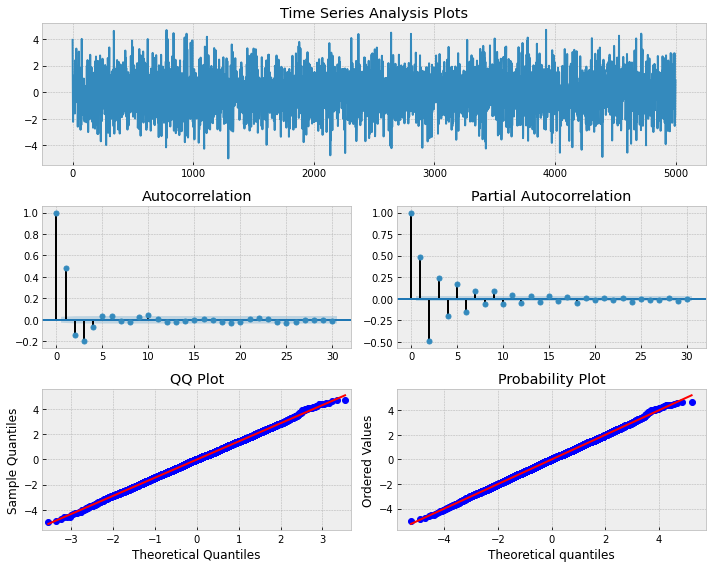

In [2]:
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms
import matplotlib.pyplot as plt

def tsplot(y, lags=None,figsize=(10,8),style='bmh'):
  if not isinstance(y, pd.Series):
    y =pd.Series(y)
  with plt.style.context(style):
    fig =plt.figure(figsize=figsize)
    layout =(3,2)
    ts_ax =plt.subplot2grid(layout,(0,0),colspan=2)
    acf_ax =plt.subplot2grid(layout,(1,0))
    pacf_ax =plt.subplot2grid(layout,(1,1))
    qq_ax =plt.subplot2grid(layout,(2,0))
    pp_ax =plt.subplot2grid(layout,(2,1))
    y.plot(ax=ts_ax)
    ts_ax.set_title('Time Series Analysis Plots')
    smt.graphics.plot_acf(y, lags=lags,ax=acf_ax,alpha=0.05)
    smt.graphics.plot_pacf(y, lags=lags,ax=pacf_ax,alpha=0.05)
    sm.qqplot(y, line='s', ax=qq_ax)
    qq_ax.set_title('QQ Plot')
    scs.probplot(y, sparams=(y.mean(),y.std()),plot=pp_ax)
    plt.tight_layout()
  return
max_lag =30
n = int(5000) # lots of samples to help estimates
burn = int(n/10) # number of samples to discard before fit
alphas =np.array([0.5,-0.25])
betas =np.array([0.5,-0.3])
ar =np.r_[1,-alphas]
ma =np.r_[1,betas]
arma22 =smt.arma_generate_sample(ar=ar,ma=ma,nsample=n,burnin=burn)
_ =tsplot(arma22,lags=max_lag)